In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import re
import string
import gensim


In [239]:
df = pd.read_csv("train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [126]:
def preprocess(sentences):
  tweet_list = []
  filter = string.ascii_letters + " "
  lm = WordNetLemmatizer()
  for tweet in sentences:
    tweet_cleaned = re.sub(r'http\S+', '', tweet)
    tweet_cleaned = "".join([chr for chr in tweet_cleaned if chr in filter])
    tweet_cleaned = tweet_cleaned.lower()
    tokens = word_tokenize(tweet_cleaned)
    clean_list = [word for word in tokens if word not in stopwords.words('english')]
    clean_list = [lm.lemmatize(word) for word in clean_list]
    tweet_cleaned = " ".join(clean_list)
    tweet_list.append(tweet_cleaned)

  return np.array(tweet_list)

In [128]:
# Making Function 

from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import string
import nltk
from nltk.tokenize import word_tokenize

def tweet(text, stemmer = False, lemmatizer = False):
    # Remove url from text with the help of regex function

    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(url_pattern, '', text)
    
    
    # Removing special character and number
    filter = string.ascii_letters + " "
    text = "".join([chr for chr in text if chr in filter])
    
    # Converting text into lower case
    text = text.lower()

    # Removing punctuation from stop words
    stop_words = nltk.corpus.stopwords.words('english')
    stop = ["".join([char for char in word if char not in string.punctuation]) for word in stop_words]
    
    token = word_tokenize(text)
    token_clean = [word for word in token if word not in stopwords.words('english')]
    
    if stemmer:
        ps= PorterStemmer()
        token_clean = [ps.stem(word) for word in token_clean]
    elif lemmatizer:
        wnl = WordNetLemmatizer()
        token_clean = [wnl.lemmatize(word) for word in token_clean]
    else:
        pass

    # Joining the token
    clean_text = " ".join(token_clean)
    return np.array(clean_text)

In [240]:
# preprocess data
df["text"] = preprocess(df["text"])


In [241]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive u,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,resident asked shelter place notified officer ...,1
3,6,NaN,NaN,people receive wildfire evacuation order calif...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pour...,1


In [242]:
df["text"].duplicated().sum()
df.drop_duplicates(subset="text", inplace=True)

In [243]:
# Spliting into train and test
from sklearn.model_selection import train_test_split

X_train, X_text, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of X_text is {X_text.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of X_train is (6090,)
Shape of X_text is (1523,)
Shape of y_train is (6090,)
Shape of y_test is (1523,)


In [245]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [234]:
unique = []

for i in X_train:
    unique.append(i)

In [235]:
set(unique)

{'severe thunderstorm warning oklahoma county pm radar okwx',
 'hm mt ebolatrends alabama home quarantined possible ebola case',
 'rt huffpostcomedy build wall keep burning man attendee coming home',
 'bovine rescued smugglersnabbed',
 'rt kotowsa south sudan war woman survivor say rape become normal thing',
 'wheeler came along struck fire truck spinning around degree causing roll',
 'woke blown lol',
 'urufusanragu mudslide',
 'man stomach feel like tsunami',
 'annajhm jcomanse paulstaubs rslm blanktgt mustve got trouble thats fartanxiety',
 'er indoors devastated rip arfur georgecole',
 'adamnibloe arrest report affiliation terrorism',
 'sometimes logic get drowned emotion got ta surface point',
 'another disaster waiting happen allowing',
 'black friday turn bloody would rather shopping mystery',
 'deal day brand new dserialpcilp lava computer pci bus dual serial board e',
 'gon na call tomorrow aul emergency dental appointment excuse like whole tooth falling incident last year',
 

In [ ]:
df['tokenized_tweets'] 

0           [this, is, a, sample, tweet]
1    [another, tweet, with, more, words]
2    [this, is, another, example, tweet]
Name: tokenized_tweets, dtype: object

In [246]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization  #https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [247]:
# This work same as .fit
text_vectorizer.adapt(X_train)

In [248]:
import random 
random_index = random.choice(range(len(X_train)))
tweet = X_train.iloc[random_index]
print(tweet)

text_vectorizer(tweet)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [249]:
tweet_len = []
for tweet in X_train:
    tweet_len.append(len(tweet))

pd.Series(tweet_len).describe()

count    6090.000000
mean       62.669458
std        24.045311
min         3.000000
25%        45.000000
50%        64.000000
75%        81.000000
max       137.000000
dtype: float64

<Axes: ylabel='Density'>

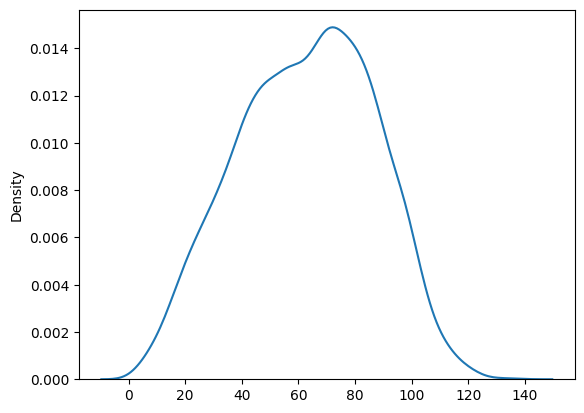

In [250]:
sns.kdeplot(tweet_len)